<a href="https://colab.research.google.com/github/charlie-aashutosh/Time_Series_Analysis/blob/main/SARIMA_seasonal_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import statsmodels.api as sms

In [73]:
data=pd.read_csv("/content/airline_passengers.csv")

In [74]:
data.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [75]:
data.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [76]:
data.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [77]:
data.dropna(axis=0,inplace=True)

In [78]:
data.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [80]:
data['Month']=pd.to_datetime(data['Month'])

In [81]:
data.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [82]:
data.set_index('Month',inplace=True)

In [83]:
data.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

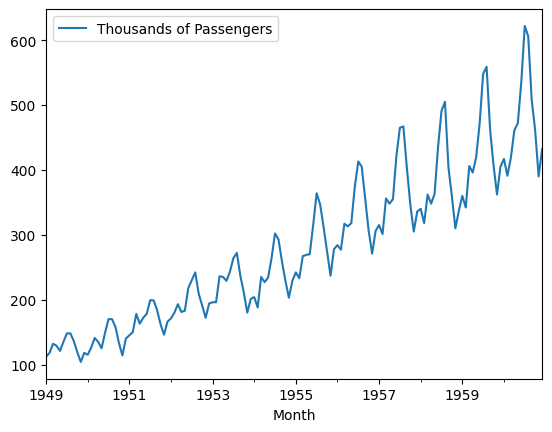

In [84]:
data.plot()

In [85]:
from statsmodels.tsa.stattools import adfuller

In [86]:

def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [87]:
adf_test(data['Thousands of Passengers'])

ADF Statistics: 0.8153688792060498
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [88]:
## Use Techniques Differencing
data['Passengers First Difference']=data['Thousands of Passengers']-data['Thousands of Passengers'].shift(1)

In [89]:
data.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [90]:
adf_test(data['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700047
p- value: 0.05421329028382478
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [91]:
data['Passengers Second Difference']=data['Passengers First Difference']-data['Passengers First Difference'].shift(1)

In [92]:
adf_test(data['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468513
p- value: 2.7328918500142026e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [93]:
## Use Techniques Differencing for 12 months
data['Passengers 12 Difference']=data['Thousands of Passengers']-data['Thousands of Passengers'].shift(12)

In [94]:
adf_test(data['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [95]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

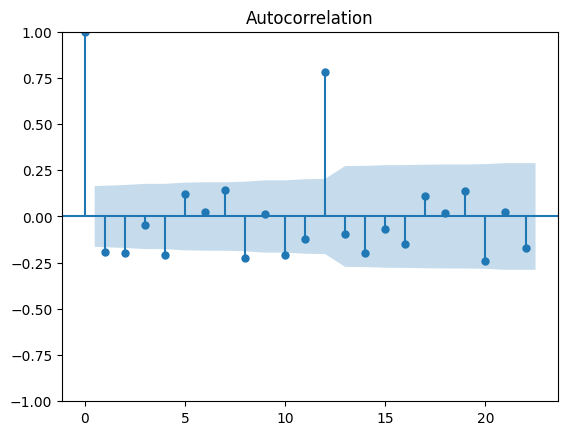

In [96]:
acf = plot_acf(data["Passengers Second Difference"].dropna())

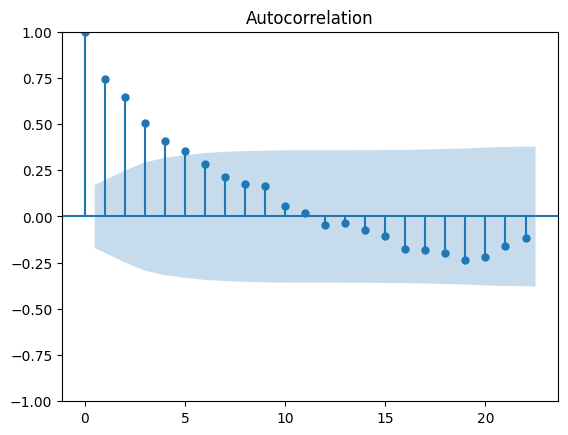

In [97]:
acf12 = plot_acf(data["Passengers 12 Difference"].dropna())

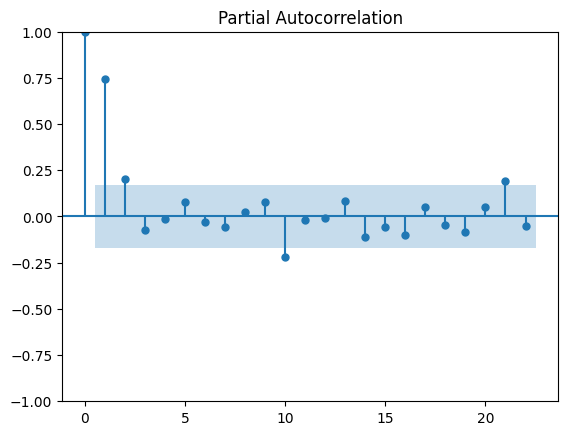

In [98]:
pacf12 = plot_pacf(data["Passengers 12 Difference"].dropna())

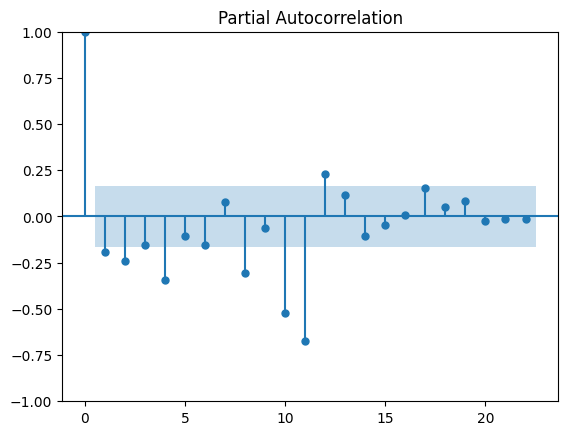

In [99]:
result = plot_pacf(data["Passengers Second Difference"].dropna())

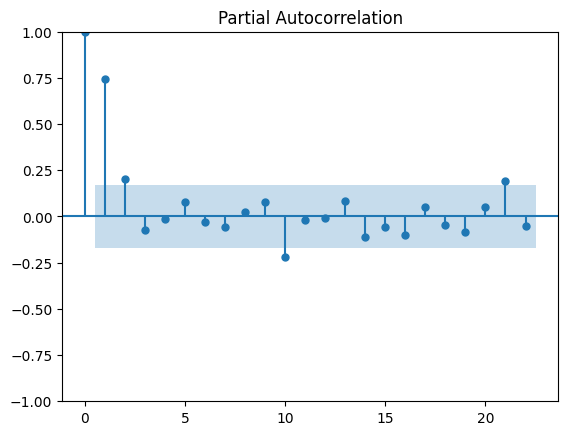

In [100]:
pacf12 = plot_pacf(data["Passengers 12 Difference"].dropna())

In [101]:
#splitting the data
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [102]:
train_data=data[:train_dataset_end]
test_data=data[train_dataset_end+timedelta(days=1):test_dataset_end]

In [103]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [104]:
test_data.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0


In [105]:
train_data.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [106]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [107]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [108]:
model_SARIMA_fit=model_SARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [109]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Wed, 13 Mar 2024   AIC                            548.481
Time:                                     07:18:59   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5981      0.938      0.638      0.524      -1.239       2.436
ar.L2          0.8311      0.232      3.582      0.000       0.376       1.286
ar.L3         -0.4523      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1839      1.163      0.158      0.874      -2.095       2.463
ma.L2         -0.5340      1.260     -0.424      0.672      -3.004       1.936
ma.L3         -0.0987      0.384     -0.257      0.797      -0.851       0.653
ma.L4         -0.1273      0.337     -0.378      0.705      -0.787       0.533
ma.L5          0.2471      0.356      0.694      0.488      -0.451       0.945
sigma2        87.7331     80.954      1.084      0.278     -70.934     246.400
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
test_data.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0


In [111]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [112]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<Axes: xlabel='Month'>

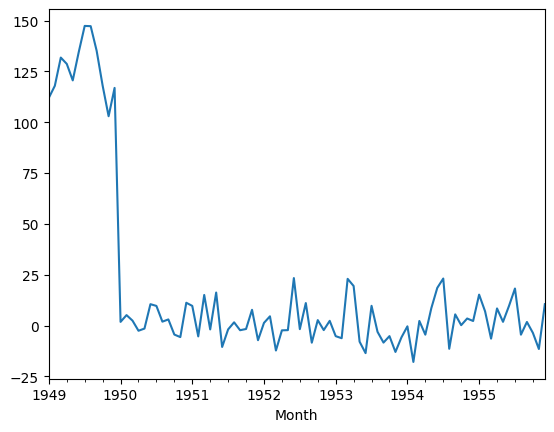

In [113]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

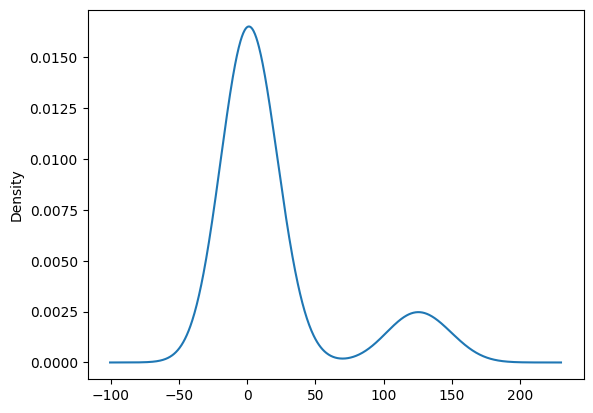

In [114]:
model_SARIMA_fit.resid.plot(kind='kde')


In [115]:
test_data['Predicted_SARIMA']=pred_Sarima

<ipython-input-115-5be0f969ecf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


<Axes: xlabel='Month'>

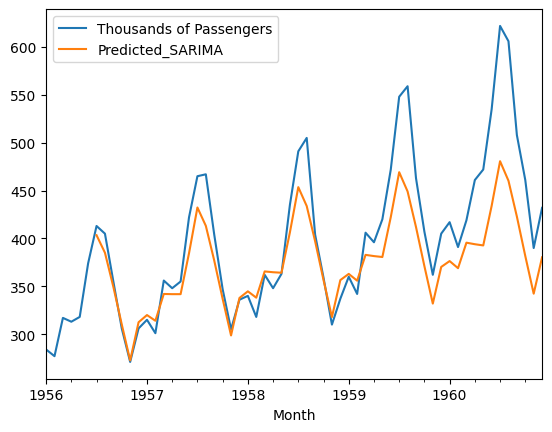

In [116]:
test_data[['Thousands of Passengers','Predicted_SARIMA']].plot()